Current in a linear chain with dephasing model
===============================================

This example shows how to add a dephasing bath as described in [this paper](https://doi.org/10.1021/acs.jpcc.6b04185). We will use the same hamiltonian as in [Transmission of a linear chain](linearchain.html)

In [1]:
import numpy
import pynegf
import scipy
#%matplotlib notebook  #Uncomment for inline plots.
import matplotlib.pyplot as plt
from scipy import sparse

In [2]:
def orthogonal_linear_chain(nsites=100, contact_size=10, coupling=1.0):
    mat = numpy.zeros(shape=(nsites, nsites), dtype='complex128')

    for i in range(nsites - contact_size):
        mat[i - 1, i] = coupling
    for i in range(nsites - contact_size, nsites):
        mat[i - 1, i] = coupling
    mat[0, nsites - contact_size] = coupling

    mat_csr = sparse.csr_matrix(mat)
    mat_csr = mat_csr + mat_csr.conjugate(copy=True).transpose()
    mat_csr.sort_indices()

    return mat_csr

mat_csr = orthogonal_linear_chain()

In [3]:
negf = pynegf.PyNegf()
negf.set_hamiltonian(mat_csr)
negf.set_identity_overlap(100)
negf.init_structure(
        ncont=2,
        contend=numpy.array([89, 99]),
        surfend=numpy.array([79, 89]),
        plend=None,
        cblk=None)

INFO:root:Running libnegf on 1 processes


When interactions are present, as in the case of dephasing, instead of the transmission we calculate energy resolved currents using the Meir-Wingreen formula. to visualize the current in a broad energy range, we set a very large chemical potential difference in the two electrodes.  

In [4]:
# Initialize parameters relevant for the transmission.
negf.params.g_spin = 1
negf.params.emin = -2.5
negf.params.emax = 2.5
negf.params.estep = 0.025
negf.params.mu[0] = 2.1
negf.params.mu[1] = -2.1
negf.set_params()

The dephasing model is activated with the method `set_elph_dephasing`

In [5]:
coupling = 0.05
negf.set_diagonal_elph_dephasing(numpy.array([coupling]*80))

negf.solve_landauer()
energies = negf.energies()
energy_resolved_current = negf.energy_current()

The energy resolved current should resemble the transmission obtained in the balistic case, but the scattering introduced by the dephasing model will reduce the current below 1 (expressed in units of ballistic current). The effect is larger where the density of state is larger, i.e. near the band edges. 

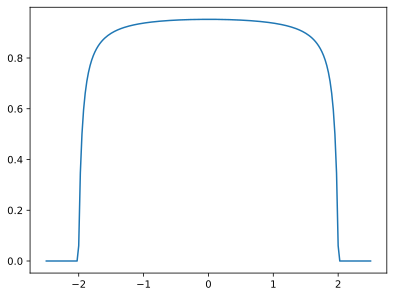

In [6]:
plt.plot(numpy.real(energies), energy_resolved_current[0, :])
plt.show()